<a href="https://colab.research.google.com/github/vyasasharanya-spec/WaterResourceManagement/blob/main/WaterResourceManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file from your computer
uploaded = files.upload()

# Get the uploaded file name dynamically
filename = next(iter(uploaded))

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Show first few rows
df.head()


Saving archive.zip to archive (1).zip


,Country,"Yearly Water Used (m³, thouand of liters)",Daily Water Used Per Capita (liters),Population
0,Afghanistan,"20,280,000,000","2,843","19,542,982"
1,Albania,"1,311,000,000","1,196","3,003,387"
2,Algeria,"9,978,000,000",678,"40,339,329"
3,Angola,"705,800,000",99,"19,450,959"
4,Antigua and Barbuda,"11,500,000",359,"87,674"


In [ ]:
# Check columns, data types, missing values
df.info()

# Check for missing values per column
df.isnull().sum()

# Basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     179 non-null    object
 1   Yearly  Water Used (m³, thouand of liters)  179 non-null    object
 2   Daily Water Used Per Capita (liters)        179 non-null    object
 3   Population                                  179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


,Country,"Yearly Water Used (m³, thouand of liters)",Daily Water Used Per Capita (liters),Population
count,179,179,179,179
unique,179,178,172,179
top,Afghanistan,"288,000,000",725,"19,542,982"
freq,1,2,2,1


In [ ]:
# Drop rows with missing values (if any)
df_clean = df.dropna()

# Or fill missing values (example: fill with 0)
# df_clean = df.fillna(0)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     179 non-null    object
 1   Yearly  Water Used (m³, thouand of liters)  179 non-null    object
 2   Daily Water Used Per Capita (liters)        179 non-null    object
 3   Population                                  179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [ ]:
print(df_clean.columns.tolist())




['Country', 'Yearly  Water Used (m³, thouand of liters)', 'Daily Water Used Per Capita (liters)', 'Population']


In [ ]:
df_clean.columns = df_clean.columns.str.strip()


In [ ]:
df_clean.rename(columns={
    'Yearly  Water Used (m³, thouand of liters)': 'Yearly_Water_Used',
    'Daily Water Used Per Capita (liters)': 'Daily_Water_Used_Per_Capita'
}, inplace=True)


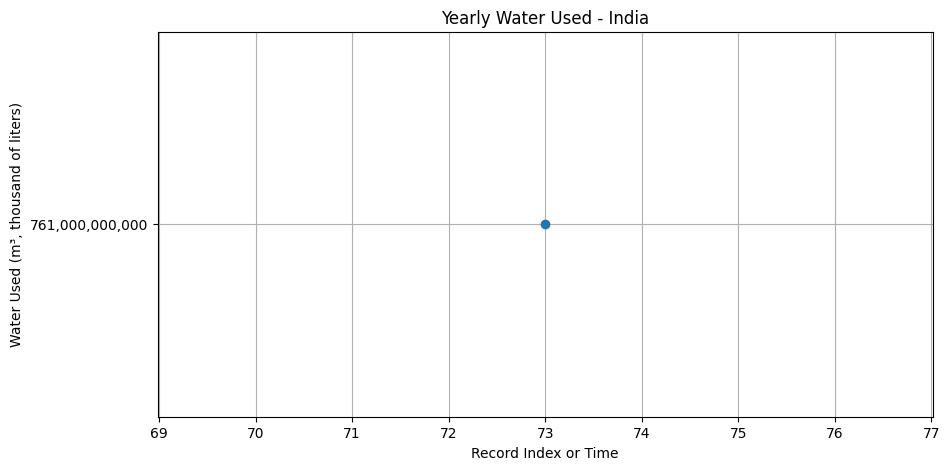

In [ ]:
import matplotlib.pyplot as plt

country = 'India'  # change as needed
subset = df_clean[df_clean['Country'] == country]

plt.figure(figsize=(10,5))
plt.plot(subset['Yearly_Water_Used'], marker='o')
plt.title(f'Yearly Water Used - {country}')
plt.xlabel('Record Index or Time')
plt.ylabel('Water Used (m³, thousand of liters)')
plt.grid(True)
plt.show()


In [ ]:
print(df_clean.columns.tolist())


['Country', 'Yearly_Water_Used', 'Daily_Water_Used_Per_Capita', 'Population']


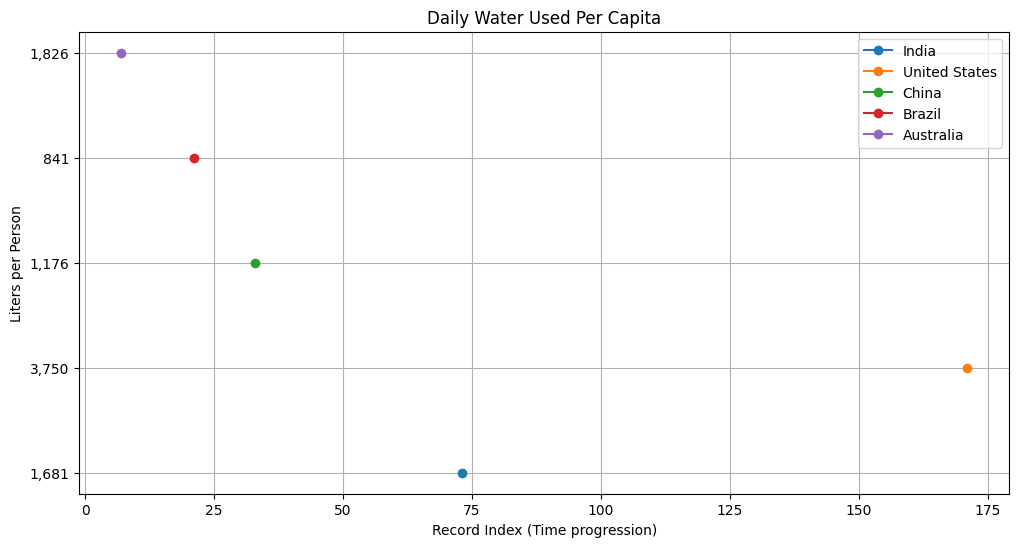

In [ ]:
import matplotlib.pyplot as plt

# Define countries to compare
selected_countries = ['India', 'United States', 'China', 'Brazil', 'Australia']

# Set up the plot
plt.figure(figsize=(12,6))

# Plot for each selected country using row index as x-axis
for country in selected_countries:
    subset = df_clean[df_clean['Country'] == country]
    plt.plot(subset.index, subset['Daily_Water_Used_Per_Capita'], marker='o', label=country)

# Add labels and legend
plt.title('Daily Water Used Per Capita')
plt.xlabel('Record Index (Time progression)')
plt.ylabel('Liters per Person')
plt.legend()
plt.grid(True)
plt.show()








In [ ]:
# Remove commas and convert columns to numeric
df_clean['Yearly_Water_Used'] = df_clean['Yearly_Water_Used'].str.replace(',', '').astype(float)
df_clean['Daily_Water_Used_Per_Capita'] = df_clean['Daily_Water_Used_Per_Capita'].str.replace(',', '').astype(float)
df_clean['Population'] = df_clean['Population'].str.replace(',', '').astype(float)


In [ ]:
print(df_clean.dtypes)


Country                         object
Yearly_Water_Used              float64
Daily_Water_Used_Per_Capita    float64
Population                     float64
dtype: object


In [ ]:
avg_daily_usage = df_clean.groupby('Country')['Daily_Water_Used_Per_Capita'].mean()
print(avg_daily_usage)


Country
Afghanistan            2843.0
Albania                1196.0
Algeria                 678.0
Angola                   99.0
Antigua and Barbuda     359.0
                        ...  
Venezuela              2252.0
Vietnam                2703.0
Yemen                   458.0
Zambia                  410.0
Zimbabwe                786.0
Name: Daily_Water_Used_Per_Capita, Length: 179, dtype: float64


In [ ]:
# Basic statistics of your dataset
print(df_clean.describe())

# Group-wise summary - average daily water use per country
avg_daily_usage = df_clean.groupby('Country')['Daily_Water_Used_Per_Capita'].mean()
print(avg_daily_usage)

# Similarly for yearly water used
avg_yearly_usage = df_clean.groupby('Country')['Yearly_Water_Used'].mean()
print(avg_yearly_usage)





       Yearly_Water_Used  Daily_Water_Used_Per_Capita    Population
count       1.790000e+02                   179.000000  1.790000e+02
mean        2.232826e+10                  1335.402235  3.913985e+07
std         8.243167e+10                  1587.623316  1.437784e+08
min         5.000000e+06                    33.000000  3.240100e+04
25%         4.987000e+08                   355.000000  2.827309e+06
50%         2.088000e+09                   844.000000  8.362829e+06
75%         1.056500e+10                  1928.500000  2.622125e+07
max         7.610000e+11                 15888.000000  1.393715e+09
Country
Afghanistan            2843.0
Albania                1196.0
Algeria                 678.0
Angola                   99.0
Antigua and Barbuda     359.0
                        ...  
Venezuela              2252.0
Vietnam                2703.0
Yemen                   458.0
Zambia                  410.0
Zimbabwe                786.0
Name: Daily_Water_Used_Per_Capita, Length: 179, dt

                             Yearly_Water_Used  Daily_Water_Used_Per_Capita  \
Yearly_Water_Used                     1.000000                     0.149475   
Daily_Water_Used_Per_Capita           0.149475                     1.000000   
Population                            0.937626                     0.039257   

                             Population  
Yearly_Water_Used              0.937626  
Daily_Water_Used_Per_Capita    0.039257  
Population                     1.000000  


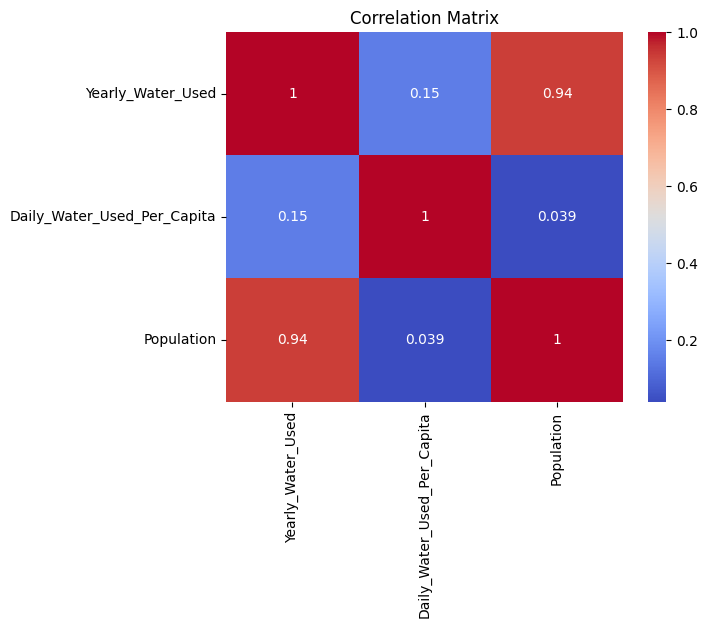

In [ ]:
import seaborn as sns

# Correlation matrix
corr = df_clean[['Yearly_Water_Used', 'Daily_Water_Used_Per_Capita', 'Population']].corr()
print(corr)

# Heatmap visualization
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Coefficients: [5.35023844e+02 5.85887879e+06]
Intercept: -6436455501.089603


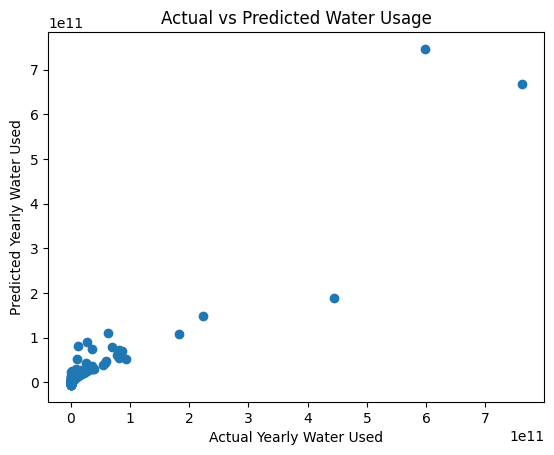

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = df_clean[['Population', 'Daily_Water_Used_Per_Capita']]
y = df_clean['Yearly_Water_Used']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Check coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Predict example
y_pred = model.predict(X)

# Plot actual vs predicted
plt.scatter(y, y_pred)
plt.xlabel('Actual Yearly Water Used')
plt.ylabel('Predicted Yearly Water Used')
plt.title('Actual vs Predicted Water Usage')
plt.show()


In [ ]:
# Save plot example
plt.savefig('daily_water_usage.png')

# Export cleaned data to CSV
df_clean.to_csv('cleaned_water_data.csv', index=False)


<Figure size 640x480 with 0 Axes>